In [1]:
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm

import cartopy.feature as cfeature
import matplotlib.pylab as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
from cartopy.util import add_cyclic_point



In [ ]:
for i in range(1,11):
    path='D:/TRABAJO/DATA/NORcpm/hindcast/hfds/Ensemble_member_'+str(i)+'/'
    for j in range(2,12):
        filename= 'hfds_Omon_ensm_'+str(i)+'_year'+str(j)+'_timmean'
        fl= Dataset(path+filename+'.nc')
        lat = fl.variables['lat'][:]
        lon = fl.variables['lon'][:]
        st  = fl.variables['hfds'][:]
        air=np.squeeze(st)
        air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)
        plt.figure(figsize=(12,12))
        ax = plt.axes(projection=ccrs.NorthPolarStereo())
        ax.coastlines(resolution = '50m')
        ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray"))
        image= ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(-300,100,20),
                           cmap=cm.BuPu_r,
                           extend='both')

  
        cb = plt.colorbar(image,ticks=np.linspace(-300,100,10), orientation='horizontal', pad=0.03, shrink = 0.8)
        cb.ax.tick_params(labelsize=12)
        cb.set_label('HFDS'+'(W/m^2)', size=20)
        plt.title(filename)
        plt.savefig(path+'Figures/'+filename+'.png')


C:\Users\Administrador\anaconda3\lib\site-packages\shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')
<ipython-input-3-2f379ce5f5f6>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,12))


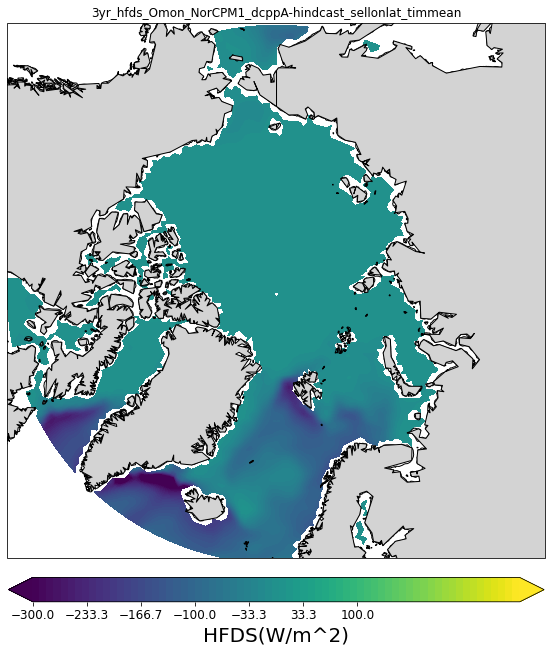

In [22]:
filename='10yr_hfds_Omon_NorCPM1_dcppA-hindcast_sellonlat_timmean'
fl= Dataset(path+filename+'.nc')
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]
st  = fl.variables['hfds'][:]
air=np.squeeze(st)
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines(resolution = '50m')
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray"))
image= ax.contourf(lon_cyc, lat, air_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(-300,100,40),
                           cmap=cm.viridis,
                           extend='both')

  
cb = plt.colorbar(image,ticks=np.linspace(-300,100,8), orientation='horizontal', pad=0.03, shrink = 0.8)
cb.ax.tick_params(labelsize=12)
cb.set_label('HFDS'+'(W/m^2)', size=20)
plt.title(filename)
plt.savefig(filename+'.png')


In [23]:
np.min(st)

-474.2173

In [24]:
np.max(st)

23.839018